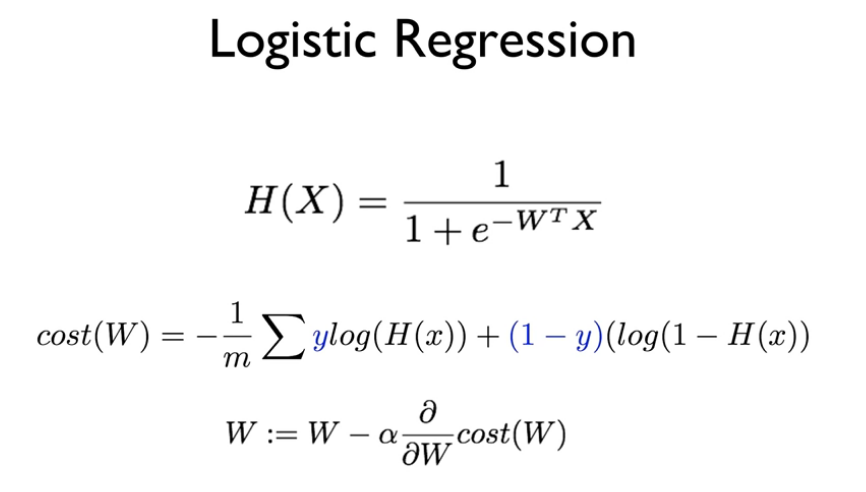

In [1]:
import tensorflow as tf

In [2]:
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

In [3]:
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 2]) # X data are composed of two components
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [6]:
# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))

In [7]:
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

In [8]:
# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype =tf.float32))

In [12]:
# Launch graph
with tf.Session() as sess:
    
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)
            
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

0 1.7307833
200 0.35986188
400 0.269885
600 0.21343495
800 0.17587237
1000 0.14942981
1200 0.12991725
1400 0.11496157
1600 0.10314393
1800 0.09357238
2000 0.085661024
2200 0.07901072
2400 0.07334042
2600 0.06844675
2800 0.06417907
3000 0.06042322
3200 0.057091605
3400 0.05411543
3600 0.051440064
3800 0.04902171
4000 0.04682453
4200 0.044819254
4400 0.042981535
4600 0.041290984
4800 0.0397305
5000 0.03828542
5200 0.036943223
5400 0.035693277
5600 0.034526277
5800 0.03343411
6000 0.03240983
6200 0.031447165
6400 0.03054069
6600 0.029685589
6800 0.028877562
7000 0.028112859
7200 0.027387971
7400 0.026699908
7600 0.026045902
7800 0.025423458
8000 0.024830336
8200 0.024264455
8400 0.02372405
8600 0.023207365
8800 0.022712866
9000 0.022239193
9200 0.021785004
9400 0.0213491
9600 0.020930404
9800 0.020527996
10000 0.020140823

Hypothesis:  [[2.8709977e-04]
 [3.2066915e-02]
 [3.9582860e-02]
 [9.5559496e-01]
 [9.9818015e-01]
 [9.9967635e-01]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 

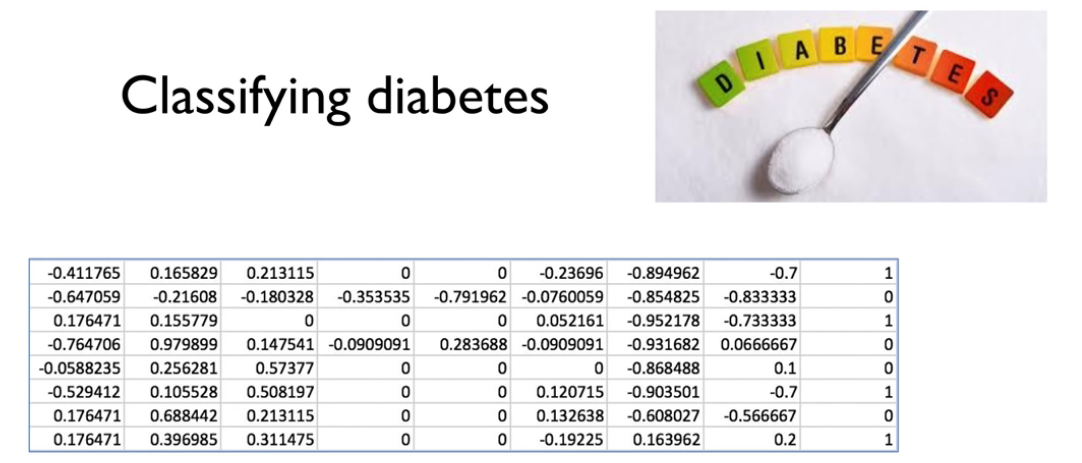

In [13]:
import numpy as np

In [15]:
xy = np.loadtxt('data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [16]:
print(x_data.shape, y_data.shape)

(759, 8) (759, 1)


In [17]:
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([8, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [18]:
# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(-tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [19]:
# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [20]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

0 0.5699942
200 0.5586872
400 0.552202
600 0.5469056
800 0.5421363
1000 0.5377485
1200 0.5336918
1400 0.5299361
1600 0.5264559
1800 0.52322876
2000 0.5202344
2200 0.51745355
2400 0.5148691
2600 0.51246524
2800 0.51022744
3000 0.5081424
3200 0.50619805
3400 0.5043833
3600 0.5026882
3800 0.5011033
4000 0.49962008
4200 0.49823102
4400 0.49692893
4600 0.49570736
4800 0.4945603
5000 0.49348256
5200 0.4924688
5400 0.49151465
5600 0.49061605
5800 0.48976886
6000 0.48896983
6200 0.48821536
6400 0.48750272
6600 0.48682898
6800 0.48619163
7000 0.4855883
7200 0.48501682
7400 0.4844752
7600 0.48396155
7800 0.483474
8000 0.48301116
8200 0.48257136
8400 0.48215333
8600 0.4817557
8800 0.48137727
9000 0.48101702
9200 0.48067382
9400 0.48034665
9600 0.48003474
9800 0.4797371
10000 0.479453

Hypothesis:  [[0.43339947]
 [0.9472056 ]
 [0.20007235]
 [0.93894386]
 [0.22785139]
 [0.757457  ]
 [0.9265796 ]
 [0.53759223]
 [0.18546855]
 [0.5403845 ]
 [0.71402186]
 [0.14679772]
 [0.35975993]
 [0.33997694]
 [0.74

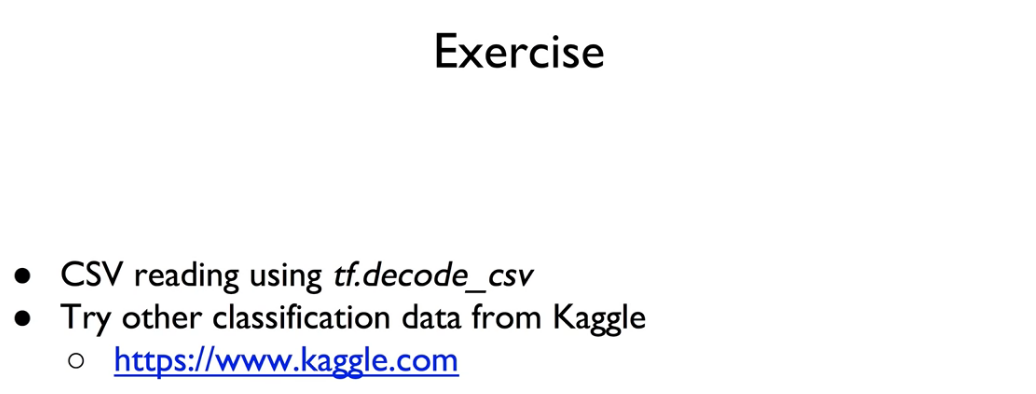